In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [3]:
crypto_currency = 'BTC'
against_currency = 'USD'

In [5]:
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [8]:
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)

In [12]:
#prepare the data(scaling)
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [16]:
prediction_days = 60

In [17]:
x_train = []
y_train = []

In [21]:
for x in range(prediction_days,len(scaled_data)): 
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [24]:
#build neural network
model = Sequential()
#adding layers to the neural network
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [25]:
model.compile(optimizer = 'adam',loss='mean_squared_error')

In [26]:
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
63/63 [==============================] - 20s 159ms/step - loss: 0.0076
Epoch 2/25
63/63 [==============================] - 9s 138ms/step - loss: 0.0021
Epoch 3/25
63/63 [==============================] - 9s 136ms/step - loss: 0.0023
Epoch 4/25
63/63 [==============================] - 9s 148ms/step - loss: 0.0019
Epoch 5/25
63/63 [==============================] - 9s 148ms/step - loss: 0.0018
Epoch 6/25
63/63 [==============================] - 8s 135ms/step - loss: 0.0015
Epoch 7/25
63/63 [==============================] - 8s 135ms/step - loss: 0.0017
Epoch 8/25
63/63 [==============================] - 8s 133ms/step - loss: 0.0013
Epoch 9/25
63/63 [==============================] - 8s 133ms/step - loss: 0.0016
Epoch 10/25
63/63 [==============================] - 8s 134ms/step - loss: 0.0012
Epoch 11/25
63/63 [==============================] - 8s 135ms/step - loss: 0.0014
Epoch 12/25
63/63 [==============================] - 9s 147ms/step - loss: 0.0015
Epoch 13/25
63/63 [=====

In [27]:
#testing
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

In [30]:
test_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',test_start,test_end)

In [31]:
actual_prices = test_data['Close'].values

In [33]:
total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)

In [36]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)- prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

In [38]:
x_test = []

for x in range(prediction_days,len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

In [39]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [40]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

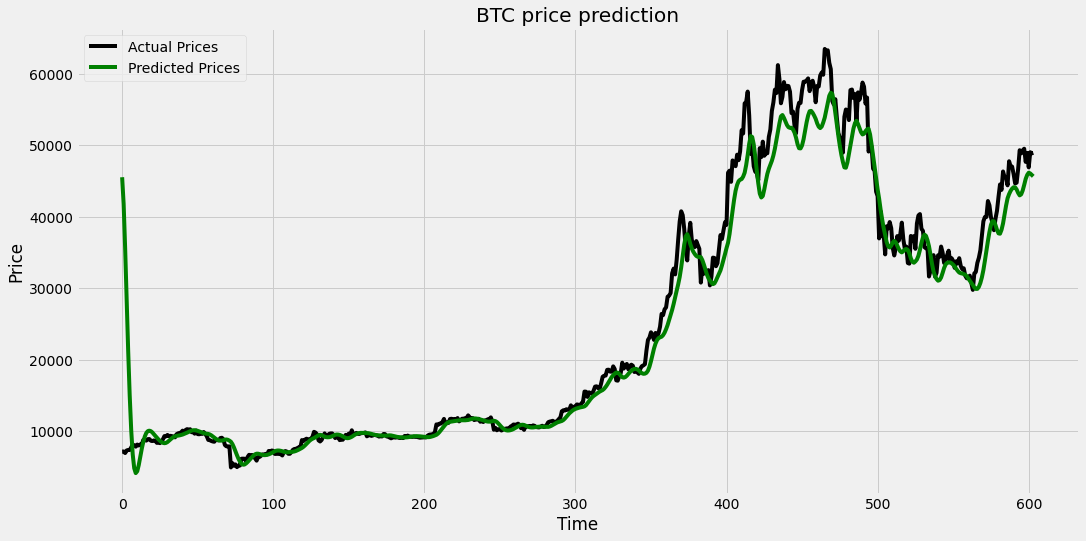

In [54]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(actual_prices,color='black',label='Actual Prices')
plt.plot(prediction_prices,color='green',label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [99]:
#next day prediction
real_data = [model_inputs[len(model_inputs)+(1)-prediction_days:len(model_inputs)+(1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

In [100]:
predictions = model.predict(real_data)
predictions = scaler.inverse_transform(predictions)

In [101]:
predictions

array([[45569.03]], dtype=float32)